In [3]:
#ordinary power by depth

from pykrige.ok3d import OrdinaryKriging3D
from pykrige.uk3d import UniversalKriging3D
from pykrige.rk import RegressionKriging
import time

import numpy as np
from matplotlib import pyplot as plt

file_name =  'output2.xlsx'

import pandas as pd
df = pd.read_excel(io=file_name, usecols=[3,7,8,10])
#print(df.head(5)) 

dfx= pd.read_excel(io=file_name, usecols=[3,7,8,9,10])
print(dfx.head(5))

#data = df.to_numpy()

#print(data) 

gridx = np.arange(34.1012, 34.2012, 0.01) #lat
gridy = np.arange(135.1450, 135.2950, 0.01) #lon
gridz = np.arange(0.0, 50, 0.1) #length

          lon        lat   alt  depth geo
0  135.191256  34.150243  18.8   0.20  FI
1  135.191256  34.150243  18.8   3.10   M
2  135.191256  34.150243  18.8   3.95  sd
3  135.191256  34.150243  18.8   6.60  GF
4  135.191256  34.150243  18.8   8.90  GF


In [4]:
rt = dfx['geo'].to_numpy()
#print(rt)
rtx = np.unique(rt)
#print(rtx)

df_ss = dfx[dfx['geo'].str.contains('Ss')] #砂岩
#print(df_alt)
#df_b = dfx[dfx['geo'].str ==('B')] what to do for duplicate letter
#df_g = dfx[dfx['geo'].str ==('G')]
df_bs = dfx[dfx['geo'].str.contains('BS')]
df_cg = dfx[dfx['geo'].str.contains('C-G')]
df_ch = dfx[dfx['geo'].str.contains('CH')]
df_cs = dfx[dfx['geo'].str.contains('CS')]
df_fi = dfx[dfx['geo'].str.contains('FI')]
df_fs = dfx[dfx['geo'].str.contains('FS')]
df_gs = dfx[dfx['geo'].str.contains('GS')]
df_gs = dfx[dfx['geo'].str.contains('MS')]

dfx_ss = df_ss.drop('geo', axis=1)
print(dfx_ss)

data = dfx_ss.to_numpy()

             lon       lat    alt   depth
20    135.211289  34.17357  124.5    9.00
33    135.205640  34.17387  196.0    2.90
34    135.205640  34.17387  196.0    6.65
35    135.205640  34.17387  196.0    7.00
36    135.205640  34.17387  196.0    9.10
...          ...       ...    ...     ...
3764  135.193190  34.17375  231.3  107.00
3765  135.193190  34.17375  231.3  111.40
3766  135.193190  34.17375  231.3  113.10
3767  135.193190  34.17375  231.3  115.90
3768  135.193190  34.17375  231.3  118.00

[737 rows x 4 columns]


Plotting Enabled

Adjusting data for anisotropy...
Initializing variogram model...
Using 'linear' Variogram Model
Slope: 12.130617468923246
Nugget: 58.09991463503509 



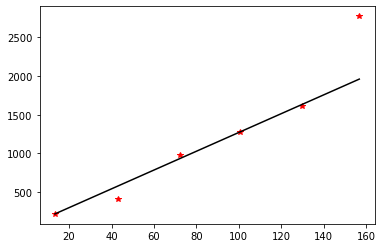

Calculating statistics on variogram model fit...
Q1 = 0.5255129675882932
Q2 = 1.1808287950139662
cR = 125.84008280139298 

Executing Ordinary Kriging...



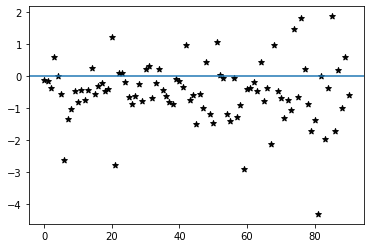

30.126505851745605 seconds


In [5]:
start = time.time()
ok3d = OrdinaryKriging3D(
    data[:,0], data[:,1], data[:,2], data[:,3], 
    variogram_model="linear",
    verbose=True, enable_plotting=True, pseudo_inv=True 
)
k3d1, ss3d = ok3d.execute("grid", gridx, gridy, gridz)
ok3d.plot_epsilon_residuals()
end = time.time()
print(end - start, "seconds")

Plotting Enabled

Adjusting data for anisotropy...
Initializing variogram model...
Using 'power' Variogram Model
Scale: 0.12358360381330248
Exponent: 1.9665786002954895
Nugget: 206.04971290246272 



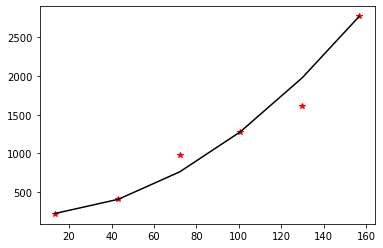

Calculating statistics on variogram model fit...
Q1 = 0.6363136399345581
Q2 = 0.7955673604810442
cR = 173.88964564632755 

Executing Ordinary Kriging...



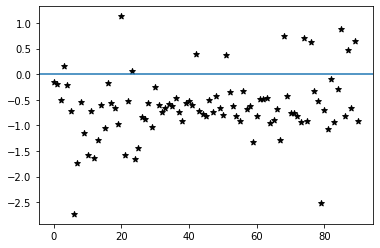

24.763883113861084 seconds


In [6]:
start = time.time()
ok3d = OrdinaryKriging3D(
    data[:,0], data[:,1], data[:,2], data[:,3], 
    variogram_model="power",
    verbose=True, enable_plotting=True, pseudo_inv=True 
)
k3d2, ss3d = ok3d.execute("grid", gridx, gridy, gridz)
ok3d.plot_epsilon_residuals()
end = time.time()
print(end - start, "seconds")

Plotting Enabled

Adjusting data for anisotropy...
Initializing variogram model...
Using 'gaussian' Variogram Model
Partial Sill: 1622.745719429244
Full Sill: 1807.2098786437289
Range: 156.69379231101226
Nugget: 184.46415921448497 



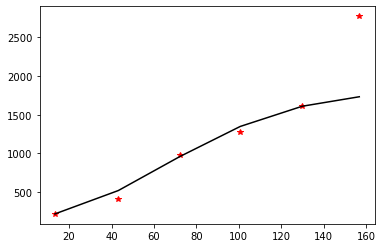

Calculating statistics on variogram model fit...
Q1 = 0.6338876723029182
Q2 = 1.020191124070956
cR = 205.01742185173393 

Executing Ordinary Kriging...



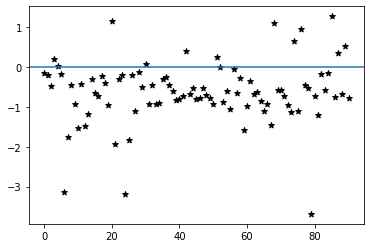

22.781769037246704 seconds


In [7]:
start = time.time()
ok3d = OrdinaryKriging3D(
    data[:,0], data[:,1], data[:,2], data[:,3], 
    variogram_model="gaussian",
    verbose=True, enable_plotting=True, pseudo_inv=True 
)
k3d3, ss3d = ok3d.execute("grid", gridx, gridy, gridz)
ok3d.plot_epsilon_residuals()
end = time.time()
print(end - start, "seconds")

Plotting Enabled

Adjusting data for anisotropy...
Initializing variogram model...
Using 'spherical' Variogram Model
Partial Sill: 1676.6848129506498
Full Sill: 1676.6848129506498
Range: 156.69379231101226
Nugget: 8.730107568853421e-15 



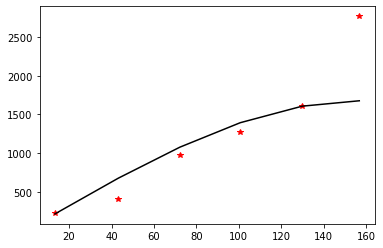

Calculating statistics on variogram model fit...
Q1 = 3.4088749263674276
Q2 = 321.925848142105
cR = 6938.345262949774 

Executing Ordinary Kriging...



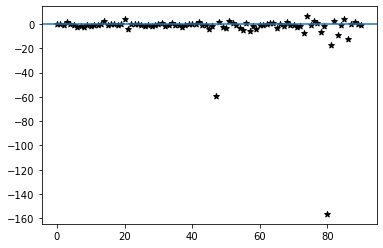

26.018370866775513 seconds


In [8]:
start = time.time()
ok3d = OrdinaryKriging3D(
    data[:,0], data[:,1], data[:,2], data[:,3], 
    variogram_model="spherical",
    verbose=True, enable_plotting=True, pseudo_inv=True 
)
k3d4, ss3d = ok3d.execute("grid", gridx, gridy, gridz)
ok3d.plot_epsilon_residuals()
end = time.time()
print(end - start, "seconds")

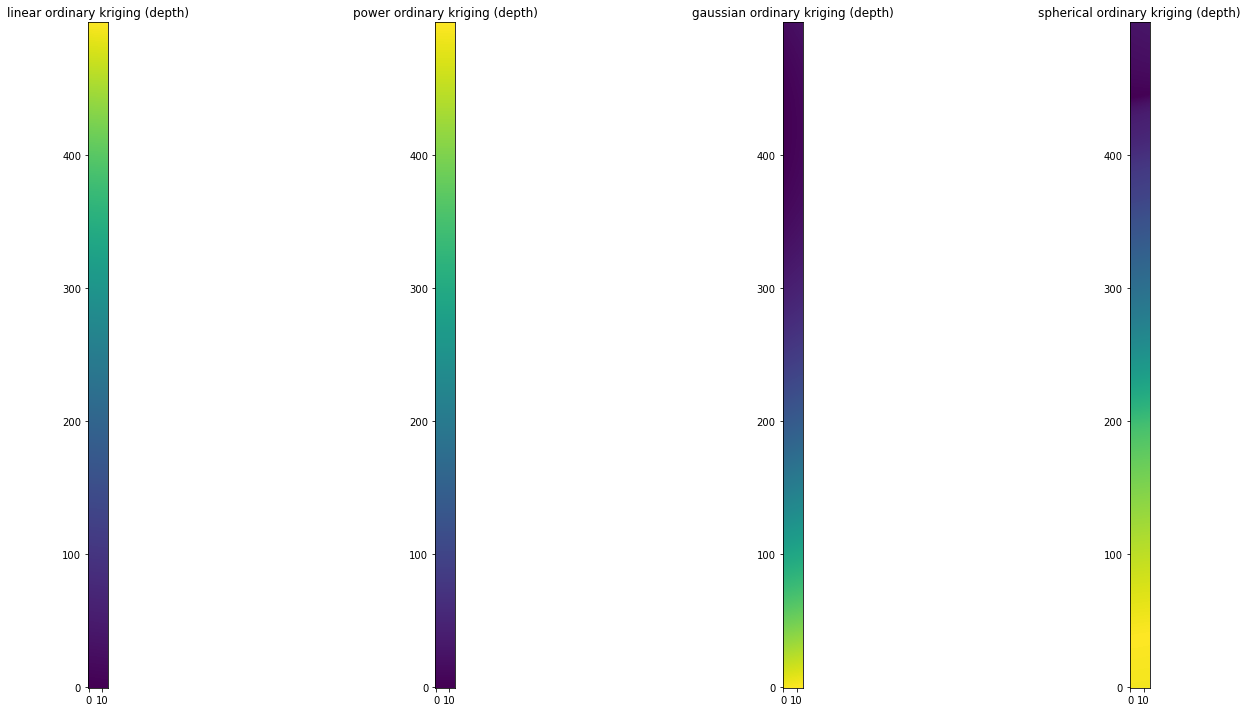

In [9]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(20, 10))
ax1.imshow(k3d1[:, :, 0], origin="lower")
ax1.set_title("linear ordinary kriging (depth)")
ax2.imshow(k3d2[:, :, 0], origin="lower")
ax2.set_title("power ordinary kriging (depth)")
ax3.imshow(k3d3[:, :, 0], origin="lower")
ax3.set_title("gaussian ordinary kriging (depth)")
ax4.imshow(k3d4[:, :, 0], origin="lower")
ax4.set_title("spherical ordinary kriging (depth)")

plt.tight_layout()
plt.show()

Plotting Enabled

Adjusting data for anisotropy...
Initializing variogram model...
Using 'linear' Variogram Model
Slope: 12.130617468923246
Nugget: 58.09991463503509 



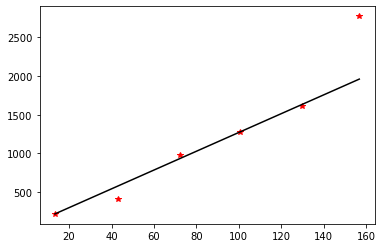

Calculating statistics on variogram model fit...
Q1 = 0.5255129675882932
Q2 = 1.1808287950139662
cR = 125.84008280139298 

Initializing drift terms...
Implementing regional linear drift.
Executing Ordinary Kriging...



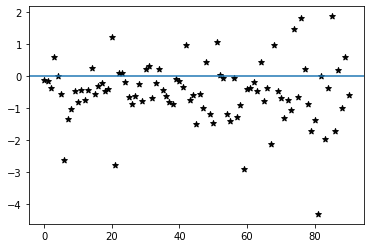

Q1 = 0.5255129675882932
Q2 = 1.1808287950139662
cR = 125.84008280139298
22.17071795463562


In [10]:
start = time.time()

uk3d = UniversalKriging3D(
    data[:, 0], data[:, 1], data[:, 2], data[:, 3],
    variogram_model="linear",
    drift_terms=["regional_linear"],
    verbose=True, enable_plotting=True, pseudo_inv=True 
)
k3d1, ss3d = uk3d.execute("grid", gridx, gridy, gridz)
#uk3d.display_variogram_model()
uk3d.plot_epsilon_residuals()
uk3d.print_statistics()

end = time.time()
print(end - start)

Plotting Enabled

Adjusting data for anisotropy...
Initializing variogram model...
Using 'power' Variogram Model
Scale: 0.12358360381330248
Exponent: 1.9665786002954895
Nugget: 206.04971290246272 



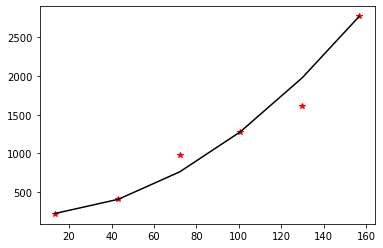

Calculating statistics on variogram model fit...
Q1 = 0.6363136399345581
Q2 = 0.7955673604810442
cR = 173.88964564632755 

Initializing drift terms...
Implementing regional linear drift.
Executing Ordinary Kriging...



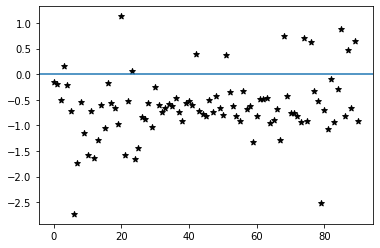

Q1 = 0.6363136399345581
Q2 = 0.7955673604810442
cR = 173.88964564632755
30.372321128845215


In [11]:
'''
zg, yg, xg = np.meshgrid(gridz, gridy, gridx, indexing="ij")
uk3d = UniversalKriging3D(
    data[:, 0], data[:, 1], data[:, 2], data[:, 3],
    variogram_model="power",
    drift_terms=["specified"],
    specified_drift=[data[:, 0], data[:, 1], data[:, 2]],
    verbose=True, enable_plotting=True, pseudo_inv=True 
)
k3d3, ss3d = uk3d.execute(
    "grid", gridx, gridy, gridz, specified_drift_arrays=[xg, yg, zg]
)

uk3d.display_variogram_model()
uk3d.plot_epsilon_residuals()
uk3d.print_statistics()
'''

start = time.time()

uk3d = UniversalKriging3D(
    data[:, 0], data[:, 1], data[:, 2], data[:, 3],
    variogram_model="power",
    drift_terms=["regional_linear"],
    verbose=True, enable_plotting=True, pseudo_inv=True 
)
k3d2, ss3d = uk3d.execute("grid", gridx, gridy, gridz)
#uk3d.display_variogram_model()
uk3d.plot_epsilon_residuals()
uk3d.print_statistics()

end = time.time()
print(end - start)

Plotting Enabled

Adjusting data for anisotropy...
Initializing variogram model...
Using 'gaussian' Variogram Model
Partial Sill: 1622.745719429244
Full Sill: 1807.2098786437289
Range: 156.69379231101226
Nugget: 184.46415921448497 



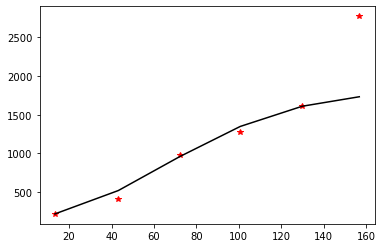

Calculating statistics on variogram model fit...
Q1 = 0.6338876723029182
Q2 = 1.020191124070956
cR = 205.01742185173393 

Initializing drift terms...
Implementing regional linear drift.
Executing Ordinary Kriging...



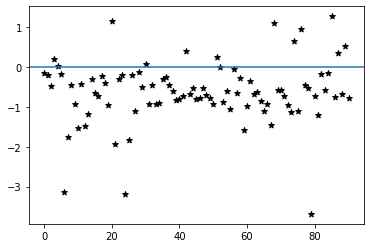

Q1 = 0.6338876723029182
Q2 = 1.020191124070956
cR = 205.01742185173393
21.546339988708496


In [12]:
'''
func = lambda x, y, z: x
uk3d = UniversalKriging3D(
    data[:, 0], data[:, 1], data[:, 2], data[:, 3],
    variogram_model="power",
    drift_terms=["functional"],
    functional_drift=[func],
    verbose=True, enable_plotting=True, pseudo_inv=True 
)
k3d4, ss3d = uk3d.execute("grid", gridx, gridy, gridz)

#uk3d.display_variogram_model()
uk3d.plot_epsilon_residuals()
uk3d.print_statistics()
'''
start = time.time()

uk3d = UniversalKriging3D(
    data[:, 0], data[:, 1], data[:, 2], data[:, 3],
    variogram_model="gaussian",
    drift_terms=["regional_linear"],
    verbose=True, enable_plotting=True, pseudo_inv=True 
)
k3d3, ss3d = uk3d.execute("grid", gridx, gridy, gridz)
#uk3d.display_variogram_model()
uk3d.plot_epsilon_residuals()
uk3d.print_statistics()

end = time.time()
print(end - start)

Plotting Enabled

Adjusting data for anisotropy...
Initializing variogram model...
Using 'spherical' Variogram Model
Partial Sill: 1676.6848129506498
Full Sill: 1676.6848129506498
Range: 156.69379231101226
Nugget: 8.730107568853421e-15 



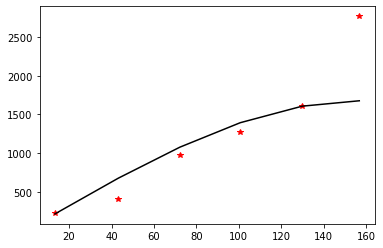

Calculating statistics on variogram model fit...
Q1 = 3.4088749263674276
Q2 = 321.925848142105
cR = 6938.345262949774 

Initializing drift terms...
Implementing regional linear drift.
Executing Ordinary Kriging...



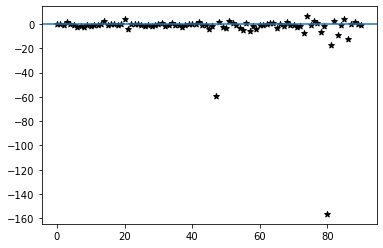

Q1 = 3.4088749263674276
Q2 = 321.925848142105
cR = 6938.345262949774
24.89871382713318


In [13]:
start = time.time()

uk3d = UniversalKriging3D(
    data[:, 0], data[:, 1], data[:, 2], data[:, 3],
    variogram_model="spherical",
    drift_terms=["regional_linear"],
    verbose=True, enable_plotting=True, pseudo_inv=True 
)
k3d4, ss3d = uk3d.execute("grid", gridx, gridy, gridz)
#uk3d.display_variogram_model()
uk3d.plot_epsilon_residuals()
uk3d.print_statistics()

end = time.time()
print(end - start)

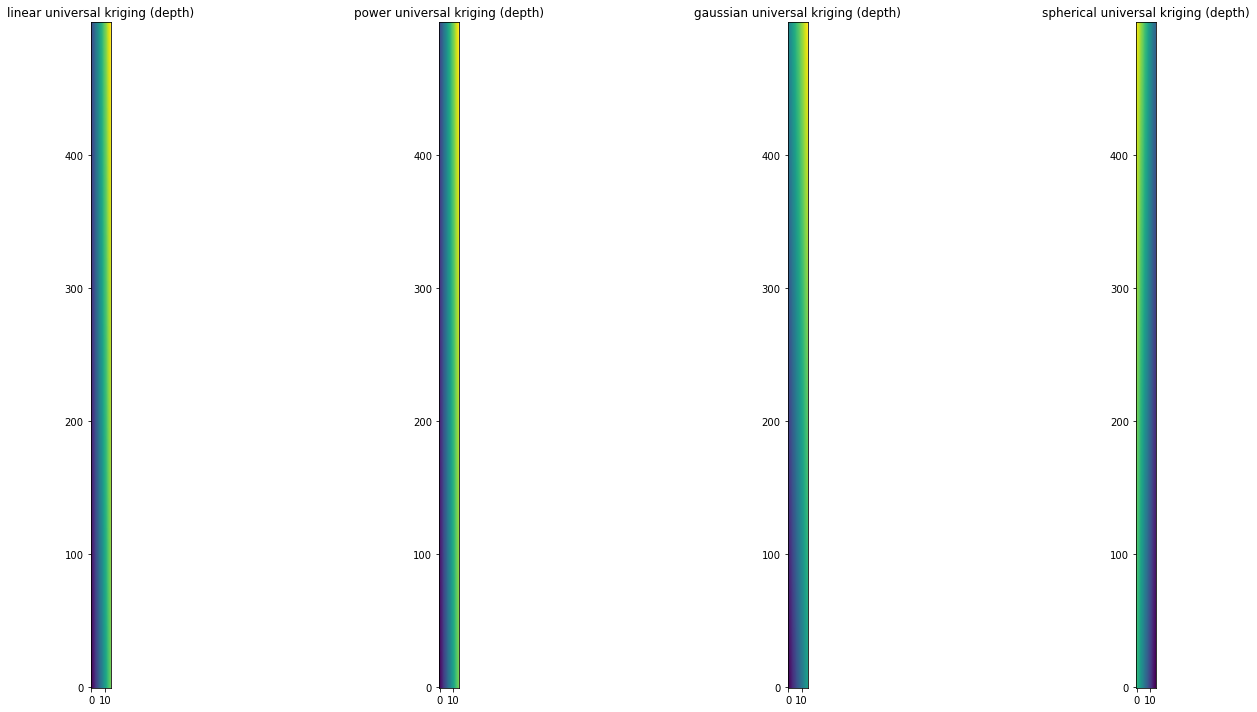

In [14]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(20, 10))
ax1.imshow(k3d1[:, :, 0], origin="lower")
ax1.set_title("linear universal kriging (depth)")
ax2.imshow(k3d2[:, :, 0], origin="lower")
ax2.set_title("power universal kriging (depth)")
ax3.imshow(k3d3[:, :, 0], origin="lower")
ax3.set_title("gaussian universal kriging (depth)")
ax4.imshow(k3d4[:, :, 0], origin="lower")
ax4.set_title("spherical universal kriging (depth)")

plt.tight_layout()
plt.show()

In [15]:
import numpy as np
from pykrige.rk import Krige
from sklearn.model_selection import GridSearchCV

estimator = GridSearchCV(Krige(), param_dict3d, verbose=True, return_train_score=True)

file_name =  'output2.xlsx'
import pandas as pd
dfx= pd.read_excel(io=file_name, usecols=[3,7,8,9,10])
print(dfx)
df_ss = dfx[dfx['geo'].str.contains('Ss')] #砂岩
dfx_ss = df_ss.drop(['geo','depth'], axis=1)
dfx_y = df_ss.drop(['lat','lon','alt','geo'], axis=1)

pd.set_option('display.max_rows', df_ss.shape[0]+1)
print(df_ss)

NameError: name 'param_dict3d' is not defined